# 0. Introduction

In this assignment, we work with artificial neural networks (ANNs) using some of the examples seen in the lessons to create new programs and algorithms. We will refer to these base programs as "Group 1" and "Group 2", as they involve different aspects of ANNs. The proposed exercises are presented in in Parts 1 and 2. 

The base programs are as follows, both written in python:
- Group 1: ANNs programmed from scratch to predict the iris type from the flower traits.
- Group 2: high-level ANNs to predict diabetes / dividends.

# 1. Adapting Group 2 for the iris dataset

## Objectives

The aim of this Part is to adapt the diabetes prediction to the iris dataset used in Group 1, obtaining a program that predicts the traits of flowers using high-level ANNs. This will involve some workarounds, since now we want to predict categories and with the diabetes/dividend we were working with binary prediction.

## Datasets and libraries

The main python libraries used across the code are:
- `numpy`: fundamental package for scientific computing in Python.
- `pandas`: for a more powerful handling of the datasets.
- `pyplot`: we will use the submodule `matplotlib` to do most of the plots.
- `sklearn`: open source tool built on top of NumPy, and matplotlib. Along with its submodules, it will be the package used to carry out the coding related to the learning procedures.

Apart from the libraries pre-imported in the following cell, we import other `sklearn` submodules when needed.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

The only dataset used in this Part is `IrisData1.csv`, which will be explored in the following section.

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("IrisData1.csv", sep = ",")
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.describe() # Taking a look at the mean values, the minimum and maximums, we can observe that all features are of the same order.

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info() # There are no "non-nulls"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Train-test split and model fitting

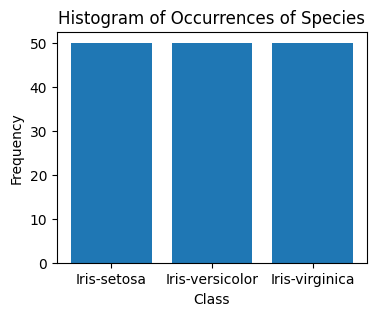

In [5]:
# We can observe that there are only three types of species and their counts are equal, 50 in this case.

unique_values, counts = np.unique(df.iloc[:, -1], return_counts=True)


plt.figure(figsize=(4, 3)) 
plt.bar(unique_values, counts)
plt.xlabel('Class'); plt.ylabel('Frequency')
plt.title('Histogram of Occurrences of Species')
plt.show()

In [6]:
features = pd.read_csv("IrisData1.csv", sep = ",")
labels = features.pop(('Species')) # Selects a column of the data and drops it at the same time
X = np.array(features)

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = sklearn.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(np.array(labels))

unique_classes = label_encoder.classes_
encoded_values = label_encoder.transform(unique_classes)

equivalences_df = pd.DataFrame({'Original Label': unique_classes, 'Encoded Label': encoded_values})
equivalences_df

,Original Label,Encoded Label
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 1/3, random_state = 1234)
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [9]:
from sklearn.neural_network import MLPClassifier

# The MLPClassifier automatically sets the input layer's and output layer's shape
# We only get to set the hidden_layer_size. We set it to 10 i.e. there are 10 neurons 
mlp = MLPClassifier(hidden_layer_sizes = (10,), 
                    activation = 'relu', 
                    solver = 'adam', 
                    max_iter = 2000, 
                   random_state = 4321)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=4321)

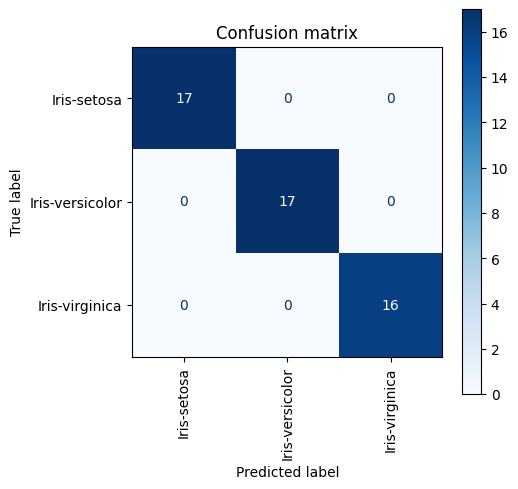


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
cmp = ConfusionMatrixDisplay(confusion_matrix= cm)

fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax, cmap = plt.cm.Blues)

ax.set_xticklabels(label_encoder.classes_, rotation = 90)
ax.set_yticklabels(label_encoder.classes_)

plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 2. Adapting Group 1 for the dividend dataset

## Objectives

The aim of this Part is to adapt the iris prediction to the dividend dataset used in the R version of Group 2, programming an ANN from scratch.

## Datasets and libraries

The main python libraries used across the code are:
- `numpy`: fundamental package for scientific computing in Python.
- `pandas`: for a more powerful handling of the datasets.
- `matplotlib`: to do most of the plots.
- `seaborn`: visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

Notice how all the pre-imported libraries for this Part are used to compute and visualize. We will use these to create the ANN from scratch and obtain results without the aid of any external Statistical Learning library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

The only dataset used in this Part is `dividendinfo.csv`, which will be explored in the following section.

## Prodecure

### Reading the data

* dividend: Binary indicator of whether the stock pays dividend.
* fcfps: Represents the free cash flow per share, how much cash a company generates relative to its share count.
* earnings_growth: Percentage growth in earnings.
* de: Debt to equity ratio. Indicates company's financial leverage and is a measure of the degree to which a company is financing its operations through debt
* mcap: Market capitalization.
* current_ratio: Liquidity ratio that measures a company's ability to pay short-term obligations with its current assets.

In [2]:
dividend_data = pd.read_csv("dividendinfo.csv")
dividend_data.head()

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
0,0,2.75,-19.25,1.11,545,0.924056
1,1,4.96,0.83,1.09,630,1.468572
2,1,2.78,1.09,0.19,562,1.975875
3,0,0.43,12.97,1.70,388,1.941998
4,1,2.94,2.44,1.83,684,2.487467


In [3]:
#Check the dataset to make sure no data is missing and Check the class labels
def verify_dataset(data):
  #if any of the rows have missing value return datas missing
  data_found = 1
  for each_column in data.columns:
    if data[each_column].isnull().any():
            print("Data missing in Column " + each_column)
            #if any rows are not missing return Dataset is complete. No missing value
            quit()
    if data_found == 1:
        print("Dataset is complete. No missing values")
    return

verify_dataset(dividend_data)

Dataset is complete. No missing values


### One hot encoding function

In [4]:
#This function accepts an array of categorical variables and returns the one hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized


### Data normalization function

In [5]:
#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

### Activation function definitions

In [6]:
#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def user_softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

### Selecting features from a list

In [7]:
'''Change the values below'''
fcfps = True
earnings_growth = True
de = True
mcap	 = True
current_ratio = True
'''Change the values above'''

feature_list = [fcfps, earnings_growth, de, mcap, current_ratio]

### Selecting features and running the normalization function

In [8]:
#Specifying the input data "x"
columns = ['fcfps', 'earnings_growth', 'de', 'mcap', 'current_ratio']
x = pd.DataFrame(dividend_data, columns=columns)
x = x.to_numpy()
x = x[:,feature_list]
x = normalize(x)

### Labelling output data and applying one hot encoding

In [9]:
#Replace the species with 1,2 or 3 as appropriate
label_dict = dict()
label_dict['0'] = '0'
label_dict['1'] = '1'
dividend_data['dividend'].replace(['0', '1'], [0, 1], inplace=True)

#Get Output, flatten and encode to one-hot
columns = ['dividend']

y = pd.DataFrame(dividend_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)


### Train test splitting

In [10]:
x_y = pd.DataFrame(np.concatenate((x,y), axis=1))
def split_dataset_test_train(data,train_size):
  data = data.sample(frac=1).reset_index(drop=True)
  training_data = data.iloc[:int(train_size * len(data))].reset_index(drop=True)
  testing_data = data.iloc[int(train_size * len(data)):].reset_index(drop=True)
  return [training_data, testing_data]

train_test_data = split_dataset_test_train(x_y,0.7)
X_train = train_test_data[0].iloc[:,0:5].to_numpy()
X_test = train_test_data[1].iloc[:,0:5].to_numpy()

y_train = train_test_data[0].iloc[:,-1:].to_numpy()
y_test = train_test_data[1].iloc[:,-1:].to_numpy()

### Training function definition

In [11]:
def training(X_train, y_train, lr, batch_size, epochs, hidden_size):
    np.random.seed(42)  # For reproducibility

    w0 = 2 * np.random.random((X_train.shape[1], hidden_size)) - 1
    w1 = 2 * np.random.random((hidden_size, 1)) - 1  # Output layer has 1 neuron for binary classification

    bh = np.random.randn(hidden_size)
    bo = np.random.randn(1)

    num_samples = len(X_train)
    num_batch = (num_samples + batch_size - 1) // batch_size  # Ceiling division

    errors = []

    for epoch in range(epochs):
        for curr_batch in range(num_batch):
            batch_start = curr_batch * batch_size
            batch_end = min(batch_start + batch_size, num_samples)
            input_batch = X_train[batch_start:batch_end]
            labels_batch = y_train[batch_start:batch_end]

            # Forward propagation
            zh = np.dot(input_batch, w0) + bh
            layer1 = sigmoid(zh)

            zo = np.dot(layer1, w1) + bo
            layer2 = sigmoid(zo)

            # Backpropagation
            layer2_error = layer2 - labels_batch.reshape(-1, 1)
            layer2w_delta = np.dot(layer1.T, layer2_error)
            layer2b_delta = layer2_error

            dcost_dah = np.dot(layer2_error, w1.T)
            dah_dzh = sigmoid_deriv(zh)
            layer1_error = dah_dzh * dcost_dah
            layer1w_delta = np.dot(input_batch.T, layer1_error)
            layer1b_delta = layer1_error

            # Update Weights and Biases
            w0 -= lr * layer1w_delta
            bh -= lr * layer1b_delta.sum(axis=0)

            w1 -= lr * layer2w_delta
            bo -= lr * layer2b_delta.sum(axis=0)

        error = np.mean(np.abs(layer2_error))
        errors.append(error)

    return [w0, bh, w1, bo], error, errors

### Evaluation function definition

In [12]:
def evaluation(params, tst_set):
    w0, bh, w1, bo = params

    # Forward propagation
    zh = np.dot(tst_set, w0) + bh
    layer1 = sigmoid(zh)

    zo = np.dot(layer1, w1) + bo
    layer2 = sigmoid(zo)

    return layer2

### Selecting parameters and running the training function

In [ ]:
trained_params, error, errors = training(X_train, 
                                         y_train, 
                                         lr = 0.01, 
                                         batch_size = 16, 
                                         epochs = 100000, 
                                         hidden_size = 10)

### Displaying the errors from training

In [ ]:
# Plot the accuracy chart
accuracy = (1 - error) * 100

plt.plot(errors)
plt.xlabel('Training', fontsize=20)  # Adjust font size as needed
plt.ylabel('Error', fontsize=20)  # Adjust font size as needed

# Set title and tick label sizes if needed
plt.title('Training Error Over Epochs', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

print("Training Accuracy " + str(round(accuracy, 2)) + "%")


<font color='blue'>Cell 15
Running the evaluation function

### Displaying the confusion matrix

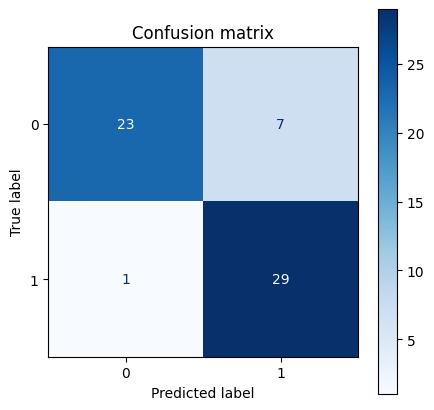


Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.77      0.85        30
         1.0       0.81      0.97      0.88        30

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



In [15]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = (evaluation(trained_params,X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred) 
cmp = ConfusionMatrixDisplay(confusion_matrix= cm)

fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax, cmap = plt.cm.Blues)


plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

### Function for testing flower dimensions

In [16]:
dividend_data

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
0,0,2.75,-19.25,1.11,545,0.924056
1,1,4.96,0.83,1.09,630,1.468572
2,1,2.78,1.09,0.19,562,1.975875
3,0,0.43,12.97,1.70,388,1.941998
4,1,2.94,2.44,1.83,684,2.487467
...,...,...,...,...,...,...
195,1,1.16,37.26,2.47,404,1.077471
196,1,3.77,16.33,0.26,760,2.483898
197,0,1.30,24.69,3.60,236,1.045505
198,0,1.60,-11.59,3.00,387,0.437697


In [52]:
def input_test_seq():
    
    fcfps = float(input('Enter the fcfps, free cash flow per share:'))
    while True:
        if float(fcfps) < 0:
            print('Inalid Entry. Enter fcfps > 0 \n')
            sepal_length = float(input('Enter the fcfps:'))
            continue
        else:
            break

    earnings_growth	 = float(input('Enter the earnings_growth:'))


    de = float(input('Enter the de, the detb to equity ratio:'))
    
    while True:
        if float(de) < 0 :
            print('Invalid Entry. Please enter a positive value.')
            de = float(input('Enter the de:'))
            continue
        else:
            break

    mcap = float(input('Enter the mcap, the market capitalization:'))
    while True:
        if float(mcap) < 0 :
            print('Invalid entry. Please enter a positive value.')
            mcap = float(input('Enter the mcap:'))
            continue
        else:
            break

    current_ratio = float(input('Enter the current_ratio, liquidity ratio:'))
    while True:
        if float(current_ratio) < 0 :
            print('Invalid entry. Please enter a positive value.')
            current_ratio = float(input('Enter the current_ratio:'))
            continue
        else:
            break
            

    predict_features = [fcfps, earnings_growth, de, mcap, current_ratio]
    predict_features = normalize(predict_features)
    result_category = evaluation(trained_params,predict_features)
    result_category = np.round(result_category)

    if result_category == 0:
        value_prediction = "NOT PAY dividends"
    elif result_category == 1:
        value_prediction = "PAY dividends"
    return value_prediction

dividend_prediction = input_test_seq()
print("The stock is most likely to:", dividend_prediction)

Enter the fcfps, free cash flow per share: 10
Enter the earnings_growth: 20
Enter the de, the detb to equity ratio: 0.1
Enter the mcap, the market capitalization: 2000
Enter the current_ratio, liquidity ratio: 100


The stock is most likely to: PAY dividends
